# Airplane Severity Dataset

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
!pip install ppscore

     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for ppscore: filename=ppscore-0.0.4-py2.py3-none-any.whl size=10575 sha256=158e638bb96b6931d204d322455c81d22378960789923955acb569fac1d7c571
  Stored in directory: /root/.cache/pip/wheels/0c/2f/cc/0df0a0bb6ace01a72ff490179e083aafa4d9f1b5325641df31
Successfully built ppscore


In [10]:
!pip install lazypredict

## Loading the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirplaneAccident.csv to AirplaneAccident.csv


In [3]:
df=pd.read_csv('AirplaneAccident.csv')

In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


## Exploring the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In the cells below, I have label encoded the column 'Severity' as 1,2,3,4 on the basis of severity. As we know the machine learning model understands only numbers. Also I haven't applied one-hot encoding because there was heirarchy in the column severity.

In [6]:
df['Severity'].nunique()

4

In [7]:
df["Severity"].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [8]:
l = {"Severity": {"Highly_Fatal_And_Damaging": 4, "Significant_Damage_And_Serious_Injuries": 2,
                 "Minor_Damage_And_Injuries":1 ,"Significant_Damage_And_Fatalities":3 }}

In [9]:
df.replace(l, inplace=True)
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


## Using ppscore

Below, I have obtained the ppscore matrix. It basically gives more insight into the data than correlation. <p>
This is where I have used one of my secret weapon :P . I have included the link from where you can find more about ppscore.<p>
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [12]:
import ppscore as pps

In [13]:
pps.matrix(df)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,1.000000,0.403692,0.000000,0.00000,0.249392,0.115645,0.129675,0.358465,0.203499,0.000000,0.127628,0
Safety_Score,0.073862,1.000000,0.225035,0.00000,0.028290,0.000000,0.000000,0.097294,0.000000,0.000000,0.000000,0
Days_Since_Inspection,0.000000,0.407313,1.000000,0.00194,0.020764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Total_Safety_Complaints,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Control_Metric,0.019307,0.000000,0.000940,0.00000,1.000000,0.281827,0.058740,0.000000,0.075964,0.000000,0.000000,0
Turbulence_In_gforces,0.000000,0.000000,0.000000,0.00000,0.235879,1.000000,0.074012,0.000000,0.126997,0.000000,0.000000,0
Cabin_Temperature,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0
Accident_Type_Code,0.192816,0.101825,0.000000,0.00000,0.050411,0.030284,0.040054,1.000000,0.186728,0.000000,0.933104,0
Max_Elevation,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001173,0.722277,0
Violations,0.000000,0.027370,0.000000,0.00000,0.019824,0.027784,0.023884,0.000000,0.020633,1.000000,0.011039,0


In [14]:
df.corr()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,1.000000,-0.308136,-0.033429,-0.026801,0.013701,-0.031615,0.019172,0.018977,-0.019331,0.004590,0.029530,0.001033
Safety_Score,-0.308136,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.033429,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,-0.026801,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.013701,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,-0.031615,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.019172,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.018977,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,-0.019331,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.004590,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047


By the ppscore we can see that almost all the columns are quite except "Accident_Type_Code".<p>
    Which is quite evident as if we think, the type of accident can't generally define it's severity.<p>
        For instance, lets suppose there is a category as landing accidents. Now we know that landing accidents can be as minor as getting an object crashed into airplane's engine which can cause malfuntion in one of the engine to a  to an absolute blast in the aircraft if we're landing forcefully.
    

**Please do note that I have not plotted any graphs to generate insights, only because in this dataset the relations were pretty evident by the ppscore and there were very less number of columns, so it wasn't necessary. 
If you want to check my proficiency in matpotlib or seaborn, please do check my github profile where I have showcased my work on matplotlib and seaborn.**<p>
    https://github.com/SandeepanMahapatra

In [29]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

Dropped the output label and the columns which aren't useful for prediction.

In [16]:
X = df.drop(['Severity', 'Accident_ID','Accident_Type_Code'], axis=1)

y is output label

In [17]:
y=df['Severity']

## Using lazypredict

In [18]:
import lazypredict
import sys

In [19]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.4,random_state =23)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [00:23<00:00,  1.26it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.95,None,0.95,0.99
RandomForestClassifier,0.95,0.95,None,0.95,1.38
BaggingClassifier,0.94,0.94,None,0.94,0.29
ExtraTreesClassifier,0.93,0.92,None,0.93,0.79
DecisionTreeClassifier,0.92,0.92,None,0.92,0.06
SVC,0.87,0.88,None,0.87,1.81
XGBClassifier,0.84,0.84,None,0.84,1.45
NuSVC,0.83,0.82,None,0.83,2.69
QuadraticDiscriminantAnalysis,0.81,0.81,None,0.81,0.03


As we can see that LGBMClassifier outshines every other model. I have selected that. Random Forest performance is almost the same but I wanted to go with something new.

## Model fitting

In [21]:
from sklearn import *
from lightgbm import LGBMClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

I have performed hyperparameter tuning by experimenting with different values. I am still learning about hyperparameter tuning so I had to experiment different values for now.

In [22]:
lgb = LGBMClassifier(
    objective='binary',
    boosting='gbdt',
    learning_rate = 0.05,
    max_depth = 8,
    num_leaves = 80,
    n_estimators = 400,
    bagging_fraction = 0.8,
    feature_fraction = 0.9)

In [23]:
t = time.time()
print('Fitting Up')
lgb.fit(X_train,y_train)
print('Done')
print(f'Done, time = {time.time() - t}')

Fitting Up
Done
Done, time = 3.7168915271759033


In [24]:
pred=lgb.predict(X_test)

#Evaluation Metrics

##Accuracy on test set

In [25]:
print("lgb accuracy : %f" % \
      accuracy_score(lgb.predict(X_test),
                     y_test))

lgb accuracy : 0.961000


##Confusion Matrix

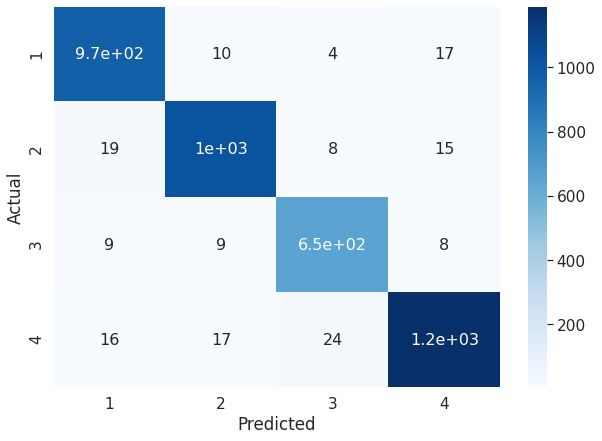

In [26]:
data = confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

##F1 Score

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, pred,average='macro')

0.9604714939273673